Running time: 6h 56m 40s (25000 seconds)

TCLab version 0.4.9
Could not connect at high speed, but succeeded at low speed.
This may be due to an old TCLab firmware.
New Arduino TCLab firmware available at:
https://github.com/jckantor/TCLab-sketch
NHduino connected on port COM11 at 9600 baud.
TCLab Firmware Version 1.01.
Time: 0 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.67
Time: 1 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.77
Time: 2 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.61
Time: 3 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.64
Time: 4 H1: 0.0 H2: 0.0 T1: 24.09 T2: 22.61
Time: 5 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.57
Time: 6 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.61
Time: 7 H1: 0.0 H2: 0.0 T1: 24.15 T2: 22.51
Time: 8 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.61
Time: 9 H1: 0.0 H2: 0.0 T1: 24.22 T2: 22.51
Time: 10 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.61
Time: 11 H1: 0.0 H2: 0.0 T1: 24.12 T2: 22.61
Time: 12 H1: 0.0 H2: 0.0 T1: 24.09 T2: 22.54
Time: 13 H1: 0.0 H2: 0.0 T1: 24.15 T2: 22.61
Time: 14 H1: 0.0 H2: 0.0 T1: 24.09 T2: 22.61
Time: 15 H1: 

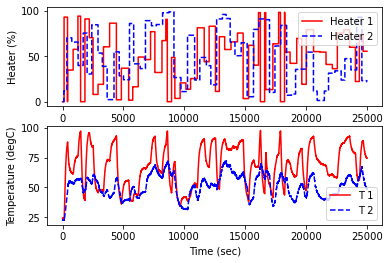

In [1]:
import numpy as np
import pandas as pd
import tclab
import time
from time import time
time1 = int (time())
del time
import time
import matplotlib.pyplot as plt
import pickle
import random
import datetime



"""
Fix list

1. Start with Q1, Q2 at 0 for at least 5 min. At the begining, start with random Q1,Q2 value?
rangeIni1 = random.randrange(5,100)
rangeIni2 = random.randrange(5,100)
rangeEnd1 = random.randrange(200,400)
rangeEnd2 = random.randrange(200,400)
random_signal[0,rangeIni1:rangeEnd1] = random.randrange(1,99)
random_signal[1,rangeIni2:rangeEnd2] = random.randrange(1,99)

2. Need to save as pkl file. Working on it

3. Set the heater range, TCLab can not go over 100deC

"""


# Convert time
def convert_seconds_to_time(in_seconds):
    t1   = datetime.timedelta(seconds=in_seconds)
    days = t1.days
    _sec = t1.seconds
    (hours, minutes, seconds) = str(datetime.timedelta(seconds=_sec)).split(':')
    hours   = int(hours)
    minutes = int(minutes)
    seconds = int(seconds)
    
    result = []
    if days >= 1:
        result.append(str(days)+'d')
    if hours >= 1:
        result.append(str(hours)+'h')
    if minutes >= 1:
        result.append(str(minutes)+'m')
    if seconds >= 1:
        result.append(str(seconds)+'s')
    return ' '.join(result)


# Choose length of training data 
nstep = 25000


# Print running time
print('Running time: ' + convert_seconds_to_time(nstep) + " (" + str(nstep) + " seconds" + ")" + '\n')


# Create np array
T1 = np.zeros(nstep)
T2 = np.zeros(nstep)


# Number of Variables that need random signal
nVar = 2
random_signal = np.zeros((nVar,nstep))
rng = np.random.seed(time1) # Use time random num


# Set random signal for TCLab
for j in range(nVar):
    a_range = [1,99]
    a = np.random.rand(nstep) * (a_range[1]-a_range[0]) + a_range[0] # Range for amplitude
    a[0] = 0
    
    b_range = [300,600]
    b = np.random.rand(nstep) *(b_range[1]-b_range[0]) + b_range[0] # Range for frequency
    b = np.round(b)
    b = b.astype(int)
    b[0] = 0
    
    for i in range(1,np.size(b)):
        b[i] = b[i-1]+b[i]
    
    # Random Signal
    i=0
    while b[i]<np.size(random_signal[j]):
        k = b[i]
        random_signal[j,k:] = a[i]
        i=i+1


# Test variables
# print(time1)
# print(random_signal[0])
# print(random_signal[1])


# Connect to Arduino
tcLab = tclab.TCLab()
tcLab.LED(50)


#Set the initial temperature
rangeIni1 = random.randrange(100,150)
rangeIni2 = random.randrange(100,150)
rangeEnd1 = random.randrange(300,500)
rangeEnd2 = random.randrange(300,500)
random_signal[0,rangeIni1:rangeEnd1] = random.randrange(1,99)
random_signal[1,rangeIni2:rangeEnd2] = random.randrange(1,99)


# Test random range
# print (range1)
# print (range2)


# Run TCLab
for i in range(nstep):
    # Set heater values
    tcLab.Q1(random_signal[0,i])
    tcLab.Q2(random_signal[1,i])
    print('Time: ' + str(i) + \
          ' H1: ' + str(random_signal[0,i]) + \
          ' H2: ' + str(random_signal[1,i]) + \
          ' T1: ' + str(tcLab.T1)   + \
          ' T2: ' + str(tcLab.T2))
    
    if (tcLab.T1 > 97):
        random_temp0_time1 = random.randrange(250,350)
        random_signal[0,i:i+random_temp0_time1] = 0
        
    if (tcLab.T2 > 97):
        random_temp0_time2 = random.randrange(250,350)
        random_signal[1,i:i+random_temp0_time2] = 0
        
    # Save temp variable
    T1[i] = tcLab.T1
    T2[i] = tcLab.T2
    
    # Record every 1 sec
    time.sleep(1)


# Close connection to Arduino
tcLab.LED(0)
tcLab.close()






# Read data file
tcL_data = pd.DataFrame(
        {"H1": random_signal[0],
         "H2": random_signal[1],
         "T1": T1,
         "T2": T2},
        index = np.linspace(1,nstep,nstep,dtype=int))

tcL_data.to_pickle('MPC_MIMO_Final_003_25000.pkl')






# Road data to check
tcL_data_out = pd.read_pickle('MPC_MIMO_Final_003_25000.pkl')

print (tcL_data_out)




# Plot measurements
plt.figure(0) 
plt.subplot(2,1,1)
plt.plot(random_signal[0],'r-', drawstyle='steps',label='Heater 1')
plt.plot(random_signal[1],'b--', drawstyle='steps',label='Heater 2')
plt.ylabel('Heater (%)')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(T1,'r-',label='T 1')
plt.plot(T2,'b--',label='T 2')
plt.ylabel('Temperature (degC)')
plt.legend(loc='best')
plt.xlabel('Time (sec)')

plt.savefig('MPC_MIMO_Final_Plot_003.png')
plt.show()

In [4]:
import datetime


def convert_seconds_to_time(in_seconds):
    t1   = datetime.timedelta(seconds=in_seconds)
    days = t1.days
    _sec = t1.seconds
    (hours, minutes, seconds) = str(datetime.timedelta(seconds=_sec)).split(':')
    hours   = int(hours)
    minutes = int(minutes)
    seconds = int(seconds)
    
    result = []
    if days >= 1:
        result.append(str(days)+'d')
    if hours >= 1:
        result.append(str(hours)+'h')
    if minutes >= 1:
        result.append(str(minutes)+'m')
    if seconds >= 1:
        result.append(str(seconds)+'s')
    return ' '.join(result)



nstep = 25000

print('Running time: ' + convert_seconds_to_time(nstep) + " (" + str(nstep) + " seconds" + ")" + '\n')


Running time: 6h 56m 40s
